In [1]:
from transformers import AutoModelForMaskedLM, AutoTokenizer, pipeline


/home/sagemaker-user/portuguese-modernbert/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("ricardoz/BERTugues-base-portuguese-cased")

print("Special tokens and their IDs:")
print(f"pad_token: {tokenizer.pad_token} - ID: {tokenizer.pad_token_id}")
print(f"cls_token: {tokenizer.cls_token} - ID: {tokenizer.cls_token_id}")
print(f"sep_token: {tokenizer.sep_token} - ID: {tokenizer.sep_token_id}")
print(f"mask_token: {tokenizer.mask_token} - ID: {tokenizer.mask_token_id}")
print(f"unk_token: {tokenizer.unk_token} - ID: {tokenizer.unk_token_id}")

# Para ver todos os tokens especiais juntos:
print("\nAll special tokens dictionary:")
print(tokenizer.special_tokens_map)

Special tokens and their IDs:
pad_token: [PAD] - ID: 0
cls_token: [CLS] - ID: 2
sep_token: [SEP] - ID: 3
mask_token: [MASK] - ID: 4
unk_token: [UNK] - ID: 1

All special tokens dictionary:
{'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}


In [3]:
model = AutoModelForMaskedLM.from_pretrained("answerdotai/ModernBERT-base")

print("Special tokens IDs from the model config:")
print(f"pad_token_id: {model.config.pad_token_id}")
print(f"cls_token_id: {model.config.cls_token_id}")
print(f"sep_token_id: {model.config.sep_token_id}")
# print(f"mask_token_id: {model.config.mask_token_id}")
print(f"bos_token_id: {model.config.bos_token_id}")  # início de sequência (se aplicável)
print(f"eos_token_id: {model.config.eos_token_id}")  # fim de sequência (se aplicável)


Special tokens IDs from the model config:
pad_token_id: 50283
cls_token_id: 50281
sep_token_id: 50282
bos_token_id: 50281
eos_token_id: 50282


In [4]:
model_path = "checkpoints/ckpt-399999"  # caminho local onde seu modelo foi salvo
# model_path = "modernbert-pt/ckpt-final"

# model = AutoModelForMaskedLM.from_pretrained(model_path)
# tokenizer = AutoTokenizer.from_pretrained(model_path)
pipe = pipeline(task="fill-mask", model=model_path)

Device set to use cuda:0


In [5]:
model.get_input_embeddings().num_embeddings

50368

In [6]:
pipe("Hoje acordei [MASK]. Meu cachorro morreu.")

[{'score': 0.10375136882066727,
  'token': 18,
  'token_str': '.',
  'sequence': 'hoje acordei.. meu cachorro morreu.'},
 {'score': 0.02071095071732998,
  'token': 606,
  'token_str': '##i',
  'sequence': 'hoje acordeii. meu cachorro morreu.'},
 {'score': 0.01050989143550396,
  'token': 33,
  'token_str': '?',
  'sequence': 'hoje acordei?. meu cachorro morreu.'},
 {'score': 0.009077987633645535,
  'token': 81,
  'token_str': 'o',
  'sequence': 'hoje acordei o. meu cachorro morreu.'},
 {'score': 0.008108653128147125,
  'token': 71,
  'token_str': 'e',
  'sequence': 'hoje acordei e. meu cachorro morreu.'}]

In [7]:
# model.push_to_hub("LucasOkamura/test-modbert")
# tokenizer.push_to_hub("LucasOkamura/test-modbert")

In [1]:
import seaborn as sns
from modernbert_trainer.lr_scheduler import get_trapezoidal_lr, get_cosine_lr

In [2]:
lr_list = []
for step in range(937500):
    lr = get_cosine_lr(
        step=step,
        max_steps=937500,
        base_lr=8e-4,
        warmup_pct=0.05,
        decay_pct=0.3,
        min_lr=1e-8
    )
    lr_list.append(lr)

<Axes: >

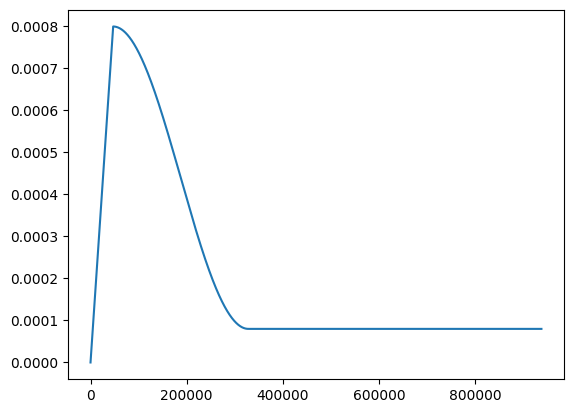

In [3]:
sns.lineplot(x = list(range(937500)), y = lr_list)